## Movie Review Sentiment Classification with an SVC model

In [52]:
import data_preprocessor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
DATA_PATH = "./data/review_polarity"

### Exploratory Data Analysis

First, clean the data from the dataset using the `data_preprocessor` module.
This ensures consistency and prepares the raw text for model training.

In [53]:
data = data_preprocessor.load_and_clean_reviews(DATA_PATH)
df = pd.DataFrame(data)

print(df.shape)

# Split DataFrame
train_df, test_df = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)

(2000, 2)


Then show some information about the data

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2000 non-null   object
 1   sentiment  2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [55]:
df.describe()

,sentiment
count,2000.000000
mean,0.500000
std,0.500125
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [56]:
df.head()

,review,sentiment
0,assume nothing phrase perhaps one use first im...,1
1,plot derek zoolander male model also dumb impr...,1
2,actually fan original liveactiondisney flick n...,1
3,movie thats highly build truman show review bo...,1
4,good hunt two movies one independent take stru...,1


In [57]:
df.tail()

,review,sentiment
1995,synopsis meteorite crashlands arizona desert c...,0
1996,anniversary slayings julie jam jennifer love h...,0
1997,coincide emerge popularity movies deal anythin...,0
1998,highflying hong kong style filmmaking make way...,0
1999,battlefield long bore plain stupid battlefield...,0


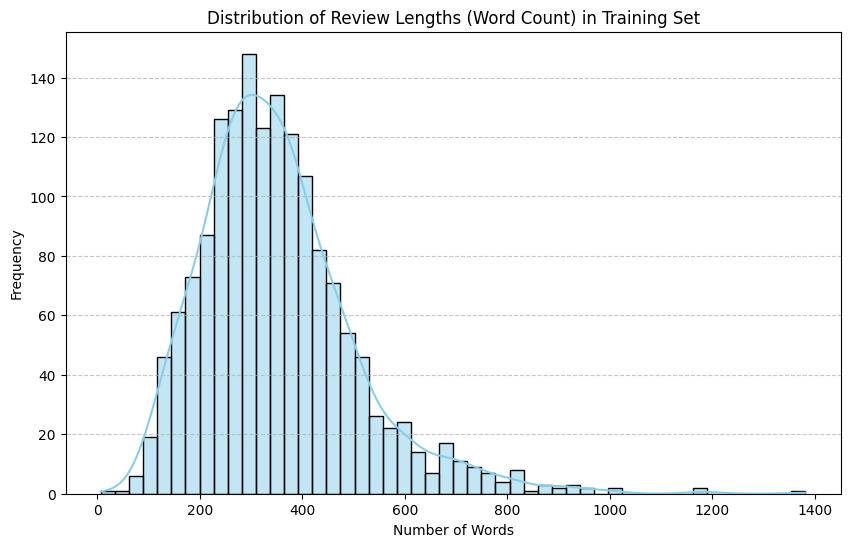

In [58]:
train_df['length'] = train_df['review'].apply(lambda x: len(x.split()))

# Distribution of review length in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='length', bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths (Word Count) in Training Set')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.close()

### Model Training

Now, get a numerical representation of the data to feed to the SVC model.

In [59]:
# Create the separate "dataframes"
X_train = train_df['review'].tolist()
y_train = train_df['sentiment'].tolist()
X_test = test_df['review'].tolist()
y_test = test_df['sentiment'].tolist()

# Prepare the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=10000,  # Increased from 5000
    ngram_range=(1, 2),  # Include bigrams
    min_df=2,            # Ignore terms appearing in < 2 documents
    max_df=0.8,          # Ignore terms appearing in > 80% of documents
    sublinear_tf=True    # Apply sublinear tf scaling
)

# Apply the vectorization to both the train and test reviews
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Once the data is vectorized, move on to training an SVC model with this data.

In [60]:
model = SVC(kernel='linear', random_state=RANDOM_SEED)
model.fit(X_train_vectorized, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [61]:
y_pred = model.predict(X_test_vectorized)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       201
           1       0.84      0.89      0.86       199

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

